In [41]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy
import glob
import gdal
import matplotlib.colors
import matplotlib.cm
import cmocean

In [42]:
file_dir = '/Users/baird/Dropbox/_data_observations/CALIPSO/'
#file_dir = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA/'

In [43]:
file_list = sorted(glob.glob(file_dir+'/*.hdf'))

In [44]:
file_list

['/Users/baird/Dropbox/_data_observations/CALIPSO/CAL_LID_L2_01kmCLay-Standard-V4-10.2018-05-31T17-55-21ZN.hdf',
 '/Users/baird/Dropbox/_data_observations/CALIPSO/CAL_LID_L2_05kmCPro-Standard-V4-10.2018-05-31T17-55-21ZN.hdf']

In [45]:
# ===== open file, pull out specific data set
gdal_file = gdal.Open(file_list[1])
gdal_subdatasets = gdal_file.GetSubDatasets()
gdal_clf_ds = gdal.Open(gdal_subdatasets[31][0]) # cloud fraction
gdal_tbc_ds = gdal.Open(gdal_subdatasets[35][0]) # total backscatter

In [46]:
gdal_clf_data = gdal_clf_ds.ReadAsArray()
gdal_tbc_data = gdal_tbc_ds.ReadAsArray()

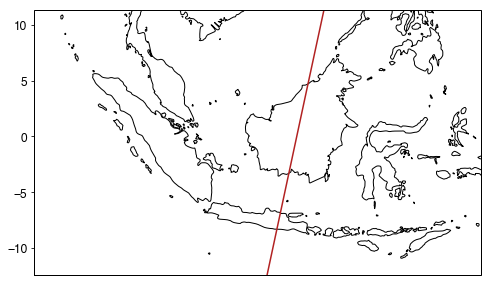

In [127]:
ds = xarray.open_dataset(file_list[1])

lat = ds['Latitude'].sel(fakeDim3=1).values
lon = ds['Longitude'].sel(fakeDim5=1).values

#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

In [128]:
cod_data = ds['Column_Optical_Depth_Cloud_532'].values
ec_data = ds['Extinction_Coefficient_532'].values
rh_data = ds['Relative_Humidity'].values
p_data = ds['Pressure'].values
igbp_data = ds['IGBP_Surface_Type'].values
clf_data = ds['Cloud_Layer_Fraction'].values
avd_data = ds['Atmospheric_Volume_Description'].values
tbc_data = ds['Total_Backscatter_Coefficient_532'].values
ciab_data = ds['Column_Integrated_Attenuated_Backscatter_532'].values
iwc_data = ds['Ice_Water_Content_Profile'].values

In [129]:
step = 1e-4
one = numpy.arange(1e-4,9e-4+step,step)

step = 0.5e-3
two = numpy.arange(1e-3,8e-3+step,step)

step = 1e-2
three = numpy.arange(1e-2,1e-1+step,step)

bounds = list(numpy.concatenate((one,two,three)))

In [130]:
cmap = matplotlib.cm.Spectral
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

In [131]:
# make color map
minval=0. # for inferno:  0.18
maxval=0.9 # for inferno: 1.0
n=256
full_cmap = cmocean.cm.ice_r #mp.get_cmap('blues')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

In [132]:
gdal_tbc_data_filtered = numpy.copy(gdal_tbc_data)
gdal_tbc_data_filtered[gdal_tbc_data_filtered<0] = 0
gdal_tbc_data_filtered[gdal_tbc_data_filtered>1.5] = numpy.nan

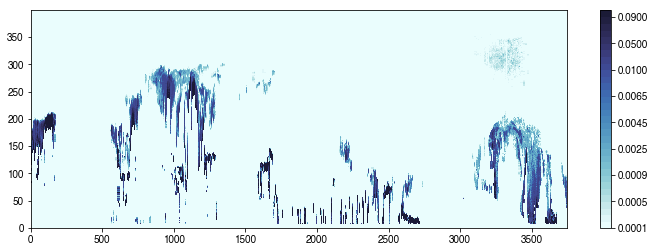

In [133]:
fig = mp.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plot = ax.pcolormesh(gdal_tbc_data_filtered.T[::-1,:], norm=norm, cmap=cmap_partial)

mp.colorbar(plot, norm=norm)

In [134]:
lat_2d = numpy.repeat(lat, p_data.shape[1]).reshape((p_data.shape))

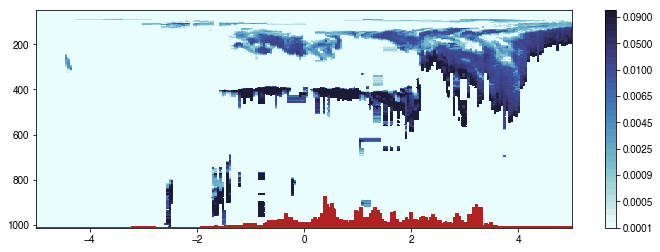

In [135]:
fig = mp.figure(figsize=(12,4))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     gdal_tbc_data_filtered.T[::-1,:], norm=norm, cmap=cmap_partial)

ax.set_facecolor('firebrick')
ax.set_ylim(1013.25,50)
ax.set_xlim(-5,5)
fig.colorbar(plot)